In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import re
from datetime import datetime
import pandas as pd

from echolalia.parser import WhatsAppParser
# from echolalia.contextualizer import Contextualizer

In [23]:
parser = WhatsAppParser()

S3_BUCKET_NAME = "smcphers-echolalia"
CHAT_LOG_FILENAME = "data/_chat.txt"

# Parse the chat log into dicts and then into a DataFrame
messages = parser.parse_chat_log(bucket=S3_BUCKET_NAME, chat_log_filename=CHAT_LOG_FILENAME)

In [24]:
messages.iloc[:50]

timestamp                    user  \
0  2022-01-17 23:15:56                     Cat   
1  2022-01-17 23:15:56  Selwyn-Lloyd McPherson   
2  2022-01-17 23:16:26                     Cat   
3  2022-01-17 23:17:24                     Cat   
4  2022-01-17 23:17:24  Selwyn-Lloyd McPherson   
5  2022-01-17 23:19:47  Selwyn-Lloyd McPherson   
6  2022-01-17 23:19:56  Selwyn-Lloyd McPherson   
7  2022-01-17 23:20:17                     Cat   
8  2022-01-17 23:20:40                     Cat   
9  2022-01-17 23:21:12  Selwyn-Lloyd McPherson   
10 2022-01-17 23:21:18  Selwyn-Lloyd McPherson   
11 2022-01-17 23:21:37                     Cat   
12 2022-01-17 23:21:55  Selwyn-Lloyd McPherson   
13 2022-01-17 23:22:16                     Cat   
14 2022-01-17 23:22:16                     Cat   
15 2022-01-17 23:22:16                     Cat   
16 2022-01-17 23:22:30                     Cat   
17 2022-01-17 23:23:28                     Cat   
18 2022-01-17 23:23:30  Selwyn-Lloyd McPherson   
19 2022-01-17 23:23:52                     Cat   
20 2022-01-17 23:24:56                     Cat   
21 2022-01-17 23:25:25  Selwyn-Lloyd McPherson   
22 2022-01-17 23:26:04                     Cat   
23 2022-01-17 23:26:24  Selwyn-Lloyd McPherson   
24 2022-01-17 23:26:34  Selwyn-Lloyd McPherson   
25 2022-01-17 23:26:38                     Cat   
26 2022-01-17 23:26:43                     Cat   
27 2022-01-17 23:27:13  Selwyn-Lloyd McPherson   
28 2022-01-17 23:28:02                     Cat   
29 2022-01-17 23:28:10  Selwyn-Lloyd McPherson   
30 2022-01-17 23:28:21                     Cat   
31 2022-01-17 23:28:18  Selwyn-Lloyd McPherson   
32 2022-01-17 23:29:00                     Cat   
33 2022-01-17 23:29:19  Selwyn-Lloyd McPherson   
34 2022-01-17 23:30:37                     Cat   
35 2022-01-17 23:30:38  Selwyn-Lloyd McPherson   
36 2022-01-17 23:31:40  Selwyn-Lloyd McPherson   
37 2022-01-17 23:31:48  Selwyn-Lloyd McPherson   
38 2022-01-17 23:32:05  Selwyn-Lloyd McPherson   
39 2022-01-17 23:32:46  Selwyn-Lloyd McPherson   
40 2022-01-17 23:32:52                     Cat   
41 2022-01-17 23:33:03  Selwyn-Lloyd McPherson   
42 2022-01-17 23:33:30                     Cat   
43 2022-01-17 23:34:05  Selwyn-Lloyd McPherson   
44 2022-01-17 23:34:17                     Cat   
45 2022-01-17 23:34:26  Selwyn-Lloyd McPherson   
46 2022-01-17 23:34:31                     Cat   
47 2022-01-17 23:34:52  Selwyn-Lloyd McPherson   
48 2022-01-17 23:35:02  Selwyn-Lloyd McPherson   
49 2022-01-17 23:35:10  Selwyn-Lloyd McPherson   

                                              message              exception  \
0                                                      No content to message   
1                                             Hello?!                   None   
2                                                  HI                   None   
3         oh good i do have it on my computer already                   None   
4                                            Success!                   None   
5                                                      No content to message   
6                                  Ooh pictures work!                   None   
7                                                yes!                   None   
8                                   can you see this?                   None   
9                                                 Oh!                   None   
10          Haha the image that comes up is so random                   None   
11  i know lol a friend of mine made me a header f...                   None   
12                             This is a weird format                   None   
13                                                     No content to message   
14                                                     No content to message   
15                                                     No content to message   
16                  you might get a kick out of those                   None   
17                    

In [25]:
# Begin to contextualize

# Filter out messages with exceptions
messages = messages[~messages['exception'].apply(lambda x: isinstance(x, str))]

# Sort by timestamp
messages = messages.sort_values(by='timestamp')

# Add time between last messages
messages['time_diff'] = messages['timestamp'].diff()

In [26]:
messages

timestamp                    user  \
1     2022-01-17 23:15:56  Selwyn-Lloyd McPherson   
2     2022-01-17 23:16:26                     Cat   
3     2022-01-17 23:17:24                     Cat   
4     2022-01-17 23:17:24  Selwyn-Lloyd McPherson   
6     2022-01-17 23:19:56  Selwyn-Lloyd McPherson   
...                   ...                     ...   
58163 2024-08-08 13:13:14                     Cat   
58164 2024-08-08 16:41:41                     Cat   
58165 2024-08-08 16:41:49                     Cat   
58166 2024-08-11 19:35:39                     Cat   
58167 2024-08-14 19:18:43  Selwyn-Lloyd McPherson   

                                                 message exception  \
1                                                Hello?!      None   
2                                                     HI      None   
3            oh good i do have it on my computer already      None   
4                                               Success!      None   
6                                     Ooh pictures work!      None   
...                                                  ...       ...   
58163                                  My turn in the er      None   
58164                             Ya girls got cirrhosis      None   
58165                                 Among other things      None   
58166                     Might have a year to live up l      None   
58167  Cat, are you there? I just got back from Italy...      None   

                                                chatline       time_diff  
1      [1/17/22, 11:15:56 PM] Selwyn-Lloyd McPherson:...             NaT  
2                         [1/17/22, 11:16:26 PM] Cat: HI 0 days 00:00:30  
3      [1/17/22, 11:17:24 PM] Cat: oh good i do have ... 0 days 00:00:58  
4      [1/17/22, 11:17:24 PM] Selwyn-Lloyd McPherson:... 0 days 00:00:00  
6      [1/17/22, 11:19:56 PM] Selwyn-Lloyd McPherson:... 0 days 00:02:32  
...                                                  ...             ...  
58163        [8/8/24, 1:13:14 PM] Cat: My turn in the er 2 days 00:28:31  
58164   [8/8/24, 4:41:41 PM] Cat: Ya girls got cirrhosis 0 days 03:28:27  
58165       [8/8/24, 4:41:49 PM] Cat: Among other things 0 days 00:00:08  
58166  [8/11/24, 7:35:39 PM] Cat: Might have a year t... 3 days 02:53:50  
58167  [8/14/24, 7:18:43 PM] Selwyn-Lloyd McPherson: ... 2 days 23:43:04  

[55038 rows x 6 columns]

In [27]:
# Create a "group" whenever the user changes
messages['group'] = (messages['user'] != messages['user'].shift()).cumsum()
messages['num_messages'] = None

In [28]:
messages

timestamp                    user  \
1     2022-01-17 23:15:56  Selwyn-Lloyd McPherson   
2     2022-01-17 23:16:26                     Cat   
3     2022-01-17 23:17:24                     Cat   
4     2022-01-17 23:17:24  Selwyn-Lloyd McPherson   
6     2022-01-17 23:19:56  Selwyn-Lloyd McPherson   
...                   ...                     ...   
58163 2024-08-08 13:13:14                     Cat   
58164 2024-08-08 16:41:41                     Cat   
58165 2024-08-08 16:41:49                     Cat   
58166 2024-08-11 19:35:39                     Cat   
58167 2024-08-14 19:18:43  Selwyn-Lloyd McPherson   

                                                 message exception  \
1                                                Hello?!      None   
2                                                     HI      None   
3            oh good i do have it on my computer already      None   
4                                               Success!      None   
6                                     Ooh pictures work!      None   
...                                                  ...       ...   
58163                                  My turn in the er      None   
58164                             Ya girls got cirrhosis      None   
58165                                 Among other things      None   
58166                     Might have a year to live up l      None   
58167  Cat, are you there? I just got back from Italy...      None   

                                                chatline       time_diff  \
1      [1/17/22, 11:15:56 PM] Selwyn-Lloyd McPherson:...             NaT   
2                         [1/17/22, 11:16:26 PM] Cat: HI 0 days 00:00:30   
3      [1/17/22, 11:17:24 PM] Cat: oh good i do have ... 0 days 00:00:58   
4      [1/17/22, 11:17:24 PM] Selwyn-Lloyd McPherson:... 0 days 00:00:00   
6      [1/17/22, 11:19:56 PM] Selwyn-Lloyd McPherson:... 0 days 00:02:32   
...                                                  ...             ...   
58163        [8/8/24, 1:13:14 PM] Cat: My turn in the er 2 days 00:28:31   
58164   [8/8/24, 4:41:41 PM] Cat: Ya girls got cirrhosis 0 days 03:28:27   
58165       [8/8/24, 4:41:49 PM] Cat: Among other things 0 days 00:00:08   
58166  [8/11/24, 7:35:39 PM] Cat: Might have a year t... 3 days 02:53:50   
58167  [8/14/24, 7:18:43 PM] Selwyn-Lloyd McPherson: ... 2 days 23:43:04   

       group num_messages  
1          1         None  
2          2         None  
3          2         None  
4          3         None  
6          3         None  
...      ...          ...  
58163  27798         None  
58164  27798         None  
58165  27798         None  
58166  27798         None  
58167  27799         None  

[55038 rows x 8 columns]

In [29]:
# Remove the first because I started the conversation (TODO: this is a hack and a half)
messages = messages.iloc[1:]

In [30]:
messages

timestamp                    user  \
2     2022-01-17 23:16:26                     Cat   
3     2022-01-17 23:17:24                     Cat   
4     2022-01-17 23:17:24  Selwyn-Lloyd McPherson   
6     2022-01-17 23:19:56  Selwyn-Lloyd McPherson   
7     2022-01-17 23:20:17                     Cat   
...                   ...                     ...   
58163 2024-08-08 13:13:14                     Cat   
58164 2024-08-08 16:41:41                     Cat   
58165 2024-08-08 16:41:49                     Cat   
58166 2024-08-11 19:35:39                     Cat   
58167 2024-08-14 19:18:43  Selwyn-Lloyd McPherson   

                                                 message exception  \
2                                                     HI      None   
3            oh good i do have it on my computer already      None   
4                                               Success!      None   
6                                     Ooh pictures work!      None   
7                                                   yes!      None   
...                                                  ...       ...   
58163                                  My turn in the er      None   
58164                             Ya girls got cirrhosis      None   
58165                                 Among other things      None   
58166                     Might have a year to live up l      None   
58167  Cat, are you there? I just got back from Italy...      None   

                                                chatline       time_diff  \
2                         [1/17/22, 11:16:26 PM] Cat: HI 0 days 00:00:30   
3      [1/17/22, 11:17:24 PM] Cat: oh good i do have ... 0 days 00:00:58   
4      [1/17/22, 11:17:24 PM] Selwyn-Lloyd McPherson:... 0 days 00:00:00   
6      [1/17/22, 11:19:56 PM] Selwyn-Lloyd McPherson:... 0 days 00:02:32   
7                       [1/17/22, 11:20:17 PM] Cat: yes! 0 days 00:00:21   
...                                                  ...             ...   
58163        [8/8/24, 1:13:14 PM] Cat: My turn in the er 2 days 00:28:31   
58164   [8/8/24, 4:41:41 PM] Cat: Ya girls got cirrhosis 0 days 03:28:27   
58165       [8/8/24, 4:41:49 PM] Cat: Among other things 0 days 00:00:08   
58166  [8/11/24, 7:35:39 PM] Cat: Might have a year t... 3 days 02:53:50   
58167  [8/14/24, 7:18:43 PM] Selwyn-Lloyd McPherson: ... 2 days 23:43:04   

       group num_messages  
2          2         None  
3          2         None  
4          3         None  
6          3         None  
7          4         None  
...      ...          ...  
58163  27798         None  
58164  27798         None  
58165  27798         None  
58166  27798         None  
58167  27799         None  

[55037 rows x 8 columns]

In [31]:
# Group by this new "group" column and concatenate the values in "messages"
messages_combined = messages.groupby('group', as_index=False).agg({
    'user': 'first',                 # Take the first value of 'user' for each group
    'timestamp': list,               # Take the first value of 'timestamp' for each group
    'message': ' '.join,             # Concatenate the values of 'message'
    'num_messages': 'size',          # Count the number of messages
    'chatline': '. '.join            # Concatenate the values of 'chatline'
})

In [32]:
messages_combined

group                    user  \
0          2                     Cat   
1          3  Selwyn-Lloyd McPherson   
2          4                     Cat   
3          5  Selwyn-Lloyd McPherson   
4          6                     Cat   
...      ...                     ...   
27793  27795  Selwyn-Lloyd McPherson   
27794  27796                     Cat   
27795  27797  Selwyn-Lloyd McPherson   
27796  27798                     Cat   
27797  27799  Selwyn-Lloyd McPherson   

                                               timestamp  \
0             [2022-01-17 23:16:26, 2022-01-17 23:17:24]   
1             [2022-01-17 23:17:24, 2022-01-17 23:19:56]   
2             [2022-01-17 23:20:17, 2022-01-17 23:20:40]   
3             [2022-01-17 23:21:12, 2022-01-17 23:21:18]   
4                                  [2022-01-17 23:21:37]   
...                                                  ...   
27793         [2024-08-01 03:51:47, 2024-08-01 03:52:26]   
27794         [2024-08-01 03:57:17, 2024-08-01 04:19:50]   
27795  [2024-08-01 04:33:09, 2024-08-01 04:33:18, 202...   
27796  [2024-08-01 16:30:04, 2024-08-04 17:06:35, 202...   
27797                              [2024-08-14 19:18:43]   

                                                 message  num_messages  \
0         HI oh good i do have it on my computer already             2   
1                            Success! Ooh pictures work!             2   
2                                 yes! can you see this?             2   
3          Oh! Haha the image that comes up is so random             2   
4      i know lol a friend of mine made me a header f...             1   
...                                                  ...           ...   
27793         Count that shit up Minus a few for laundry             2   
27794             About a dollar of Uzbek money Yeah lol             2   
27795  I just called al Italia airlines to see what k...            12   
27796  Omg I randomly have the worst cough now jfc ha...             7   
27797  Cat, are you there? I just got back from Italy...             1   

                                                chatline  
0      [1/17/22, 11:16:26 PM] Cat: HI. [1/17/22, 11:1...  
1      [1/17/22, 11:17:24 PM] Selwyn-Lloyd McPherson:...  
2      [1/17/22, 11:20:17 PM] Cat: yes!. [1/17/22, 11...  
3      [1/17/22, 11:21:12 PM] Selwyn-Lloyd McPherson:...  
4      [1/17/22, 11:21:37 PM] Cat: i know lol a frien...  
...                                                  ...  
27793  [8/1/24, 3:51:47 AM] Selwyn-Lloyd McPherson: C...  
27794  [8/1/24, 3:57:17 AM] Cat: About a dollar of Uz...  
27795  [8/1/24, 4:33:09 AM] Selwyn-Lloyd McPherson: I...  
27796  [8/1/24, 4:30:04 PM] Cat: Omg I randomly have ...  
27797  [8/14/24, 7:18:43 PM] Selwyn-Lloyd McPherson: ...  

[27798 rows x 6 columns]

## Median time diff

Looks like almost always within hours / one day. Only extreme was nine days. . .? (800000 seconds in days =  9.26 days)

In [50]:
from echolalia._utils import median_diff

In [56]:
messages_combined

group                    user  \
0          2                     Cat   
1          3  Selwyn-Lloyd McPherson   
2          4                     Cat   
3          5  Selwyn-Lloyd McPherson   
4          6                     Cat   
...      ...                     ...   
27793  27795  Selwyn-Lloyd McPherson   
27794  27796                     Cat   
27795  27797  Selwyn-Lloyd McPherson   
27796  27798                     Cat   
27797  27799  Selwyn-Lloyd McPherson   

                                               timestamp  \
0           [[2022-01-17 23:16:26, 2022-01-17 23:17:24]]   
1           [[2022-01-17 23:17:24, 2022-01-17 23:19:56]]   
2           [[2022-01-17 23:20:17, 2022-01-17 23:20:40]]   
3           [[2022-01-17 23:21:12, 2022-01-17 23:21:18]]   
4                                [[2022-01-17 23:21:37]]   
...                                                  ...   
27793       [[2024-08-01 03:51:47, 2024-08-01 03:52:26]]   
27794       [[2024-08-01 03:57:17, 2024-08-01 04:19:50]]   
27795  [[2024-08-01 04:33:09, 2024-08-01 04:33:18, 20...   
27796  [[2024-08-01 16:30:04, 2024-08-04 17:06:35, 20...   
27797                            [[2024-08-14 19:18:43]]   

                                                 message  num_messages  \
0         HI oh good i do have it on my computer already             1   
1                            Success! Ooh pictures work!             1   
2                                 yes! can you see this?             1   
3          Oh! Haha the image that comes up is so random             1   
4      i know lol a friend of mine made me a header f...             1   
...                                                  ...           ...   
27793         Count that shit up Minus a few for laundry             1   
27794             About a dollar of Uzbek money Yeah lol             1   
27795  I just called al Italia airlines to see what k...             1   
27796  Omg I randomly have the worst cough now jfc ha...             1   
27797  Cat, are you there? I just got back from Italy...             1   

                                                chatline  \
0      [1/17/22, 11:16:26 PM] Cat: HI. [1/17/22, 11:1...   
1      [1/17/22, 11:17:24 PM] Selwyn-Lloyd McPherson:...   
2      [1/17/22, 11:20:17 PM] Cat: yes!. [1/17/22, 11...   
3      [1/17/22, 11:21:12 PM] Selwyn-Lloyd McPherson:...   
4      [1/17/22, 11:21:37 PM] Cat: i know lol a frien...   
...                                                  ...   
27793  [8/1/24, 3:51:47 AM] Selwyn-Lloyd McPherson: C...   
27794  [8/1/24, 3:57:17 AM] Cat: About a dollar of Uz...   
27795  [8/1/24, 4:33:09 AM] Selwyn-Lloyd McPherson: I...   
27796  [8/1/24, 4:30:04 PM] Cat: Omg I randomly have ...   
27797  [8/14/24, 7:18:43 PM] Selwyn-Lloyd McPherson: ...   

                 median_diff  
0            0 days 00:00:58  
1            0 days 00:02:32  
2            0 days 00:00:23  
3            0 days 00:00:06  
4            0 days 00:00:00  
...                      ...  
27793        0 days 00:00:39  
27794        0 days 00:22:33  
27795        0 days 00:01:30  
27796 1 days 22:03:19.500000  
27797        0 days 00:00:00  

[27798 rows x 7 columns]

In [74]:
messages_combined['time_diff_seconds'] = messages_combined['median_diff'].dt.total_seconds()
messages_combined

group                    user  \
0          2                     Cat   
1          3  Selwyn-Lloyd McPherson   
2          4                     Cat   
3          5  Selwyn-Lloyd McPherson   
4          6                     Cat   
...      ...                     ...   
27793  27795  Selwyn-Lloyd McPherson   
27794  27796                     Cat   
27795  27797  Selwyn-Lloyd McPherson   
27796  27798                     Cat   
27797  27799  Selwyn-Lloyd McPherson   

                                               timestamp  \
0           [[2022-01-17 23:16:26, 2022-01-17 23:17:24]]   
1           [[2022-01-17 23:17:24, 2022-01-17 23:19:56]]   
2           [[2022-01-17 23:20:17, 2022-01-17 23:20:40]]   
3           [[2022-01-17 23:21:12, 2022-01-17 23:21:18]]   
4                                [[2022-01-17 23:21:37]]   
...                                                  ...   
27793       [[2024-08-01 03:51:47, 2024-08-01 03:52:26]]   
27794       [[2024-08-01 03:57:17, 2024-08-01 04:19:50]]   
27795  [[2024-08-01 04:33:09, 2024-08-01 04:33:18, 20...   
27796  [[2024-08-01 16:30:04, 2024-08-04 17:06:35, 20...   
27797                            [[2024-08-14 19:18:43]]   

                                                 message  num_messages  \
0         HI oh good i do have it on my computer already             1   
1                            Success! Ooh pictures work!             1   
2                                 yes! can you see this?             1   
3          Oh! Haha the image that comes up is so random             1   
4      i know lol a friend of mine made me a header f...             1   
...                                                  ...           ...   
27793         Count that shit up Minus a few for laundry             1   
27794             About a dollar of Uzbek money Yeah lol             1   
27795  I just called al Italia airlines to see what k...             1   
27796  Omg I randomly have the worst cough now jfc ha...             1   
27797  Cat, are you there? I just got back from Italy...             1   

                                                chatline  \
0      [1/17/22, 11:16:26 PM] Cat: HI. [1/17/22, 11:1...   
1      [1/17/22, 11:17:24 PM] Selwyn-Lloyd McPherson:...   
2      [1/17/22, 11:20:17 PM] Cat: yes!. [1/17/22, 11...   
3      [1/17/22, 11:21:12 PM] Selwyn-Lloyd McPherson:...   
4      [1/17/22, 11:21:37 PM] Cat: i know lol a frien...   
...                                                  ...   
27793  [8/1/24, 3:51:47 AM] Selwyn-Lloyd McPherson: C...   
27794  [8/1/24, 3:57:17 AM] Cat: About a dollar of Uz...   
27795  [8/1/24, 4:33:09 AM] Selwyn-Lloyd McPherson: I...   
27796  [8/1/24, 4:30:04 PM] Cat: Omg I randomly have ...   
27797  [8/14/24, 7:18:43 PM] Selwyn-Lloyd McPherson: ...   

                 median_diff  time_diff_seconds  
0            0 days 00:00:58               58.0  
1            0 days 00:02:32              152.0  
2            0 days 00:00:23               23.0  
3            0 days 00:00:06                6.0  
4            0 days 00:00:00                0.0  
...                      ...                ...  
27793        0 days 00:00:39               39.0  
27794        0 days 00:22:33             1353.0  
27795        0 days 00:01:30               90.0  
27796 1 days 22:03:19.500000           165799.5  
27797        0 days 00:00:00                0.0  

[27798 rows x 8 columns]

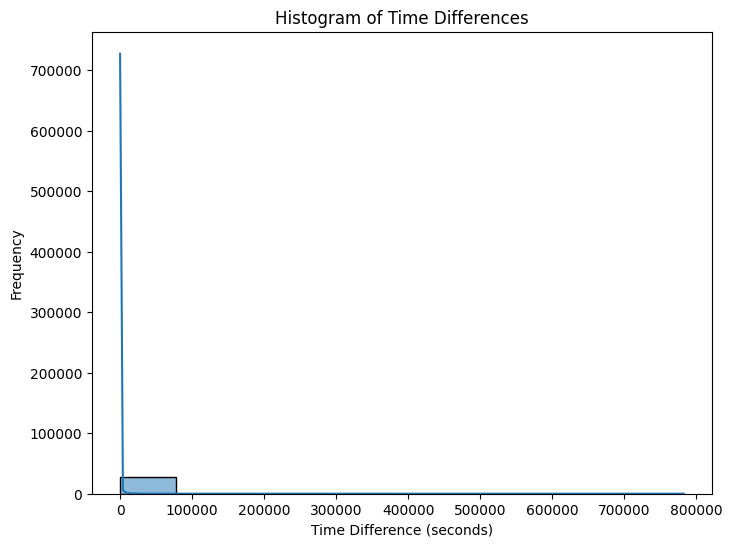

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(messages_combined['time_diff_seconds'], bins=10, kde=True)
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences')
plt.show()